In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_csv = pd.read_csv("data/titanic/train.csv")
test_csv = pd.read_csv("data/titanic/test.csv")

In [4]:
train_csv.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_csv.shape

(891, 12)

In [6]:
print(len(train_csv))
print(len(train_csv.columns))

891
12


In [7]:
pid = train_csv['Age']

print(type(pid))
pid.head(5)

<class 'pandas.core.series.Series'>


0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [8]:
sub_df = train_csv[['Survived','Pclass','Sex','Age']]

print(type(sub_df))
sub_df.head(5)

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [9]:
sub_df = train_csv[['PassengerId']]

print(type(sub_df))
sub_df.head(5)

<class 'pandas.core.frame.DataFrame'>


,PassengerId
0,1
1,2
2,3
3,4
4,5


In [10]:
# 有効値の数、型情報
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# 欠損値の数
train_csv.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# 統計量表示
train_csv.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# 統計量を個別に取得
train_csv['Fare'].min(), train_csv['Fare'].max(), train_csv['Fare'].mean(), train_csv['Fare'].median()

(0.0, 512.3292, 32.204207968574636, 14.4542)

In [14]:
# 統計量を個別に取得（最頻値）
test_csv['Pclass'].mode()

0    3
Name: Pclass, dtype: int64

In [15]:
# 値リスト
train_csv['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
# 値と件数
train_csv['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
# 条件指定のフィルタリング
train_csv[train_csv['Survived'] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<Axes: >

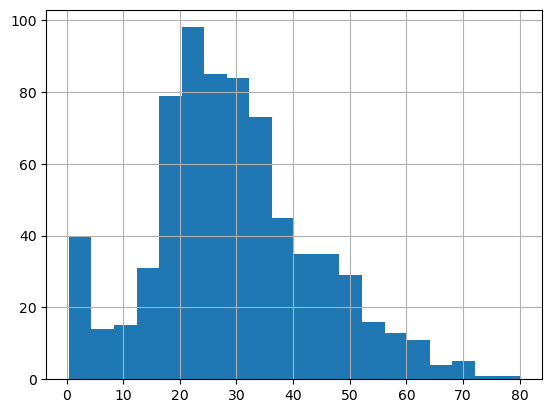

In [18]:
# ヒストグラム … 縦軸に度数、横軸に階級をとった統計グラフ。分布状況の確認に使用。
train_csv['Age'].hist(bins=20) # bins:棒の数

<Axes: >

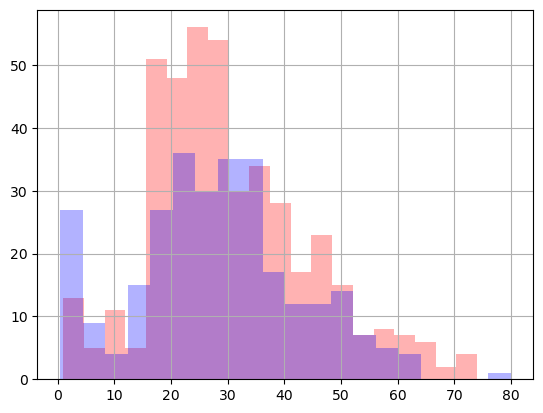

In [19]:
train_csv[train_csv['Survived'] == 0]['Age'].hist(bins=20, alpha=0.3, color='red')
train_csv[train_csv['Survived'] == 1]['Age'].hist(bins=20, alpha=0.3, color='blue')

<Axes: xlabel='Pclass'>

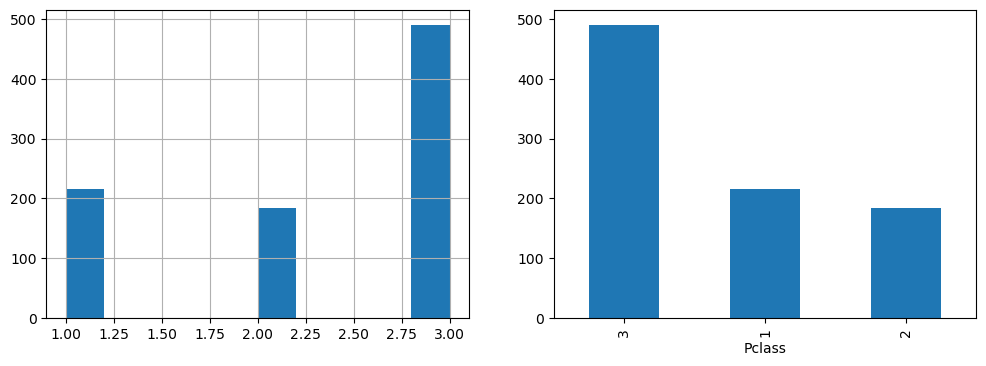

In [20]:
# 複数プロットしたい場合、plt.subplots(行数,列数) で取得したax行列を使用する
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# ヒストグラム（範囲内での頻度）
train_csv['Pclass'].hist(ax=ax[0])

# カテゴリ単位の棒グラフ
train_csv['Pclass'].value_counts().plot.bar(ax=ax[1])

In [21]:
# クロス集計
pd.crosstab(train_csv['Survived'], train_csv['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


<Axes: xlabel='Survived'>

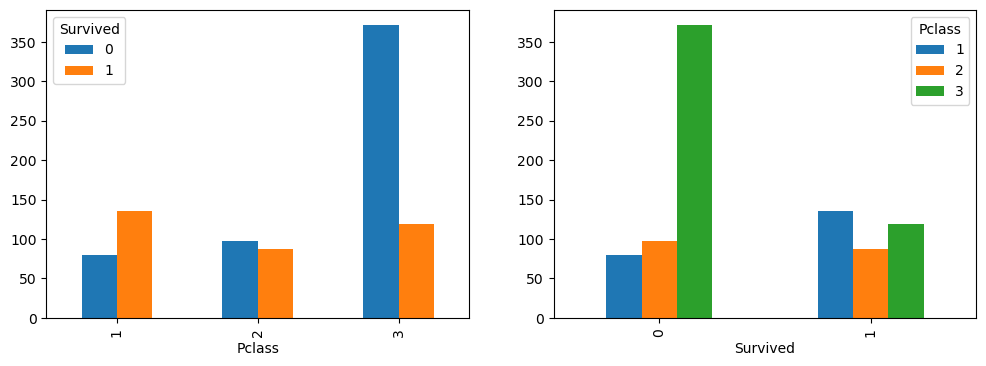

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

# クロス集計結果の棒グラフ化
pd.crosstab(train_csv['Pclass'], train_csv['Survived']).plot.bar(ax=ax[0])
pd.crosstab(train_csv['Survived'], train_csv['Pclass']).plot.bar(ax=ax[1])

<Axes: xlabel='Pclass', ylabel='count'>

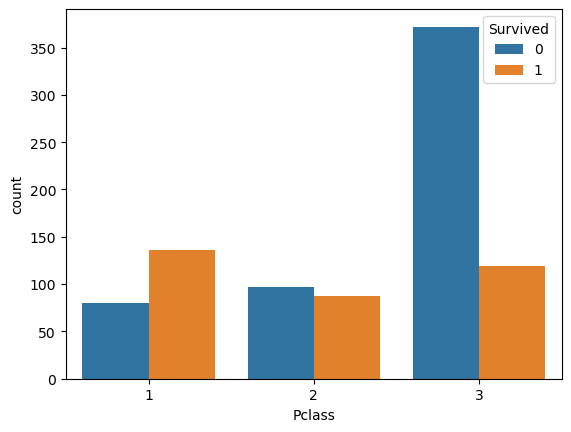

In [25]:
# Seabornを使った 件数の棒グラフ化（hue:集計列名）
sns.countplot(x='Pclass', hue='Survived', data=train_csv)

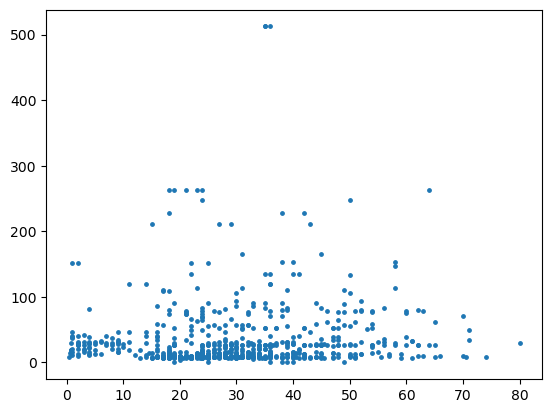

In [26]:
# 散布図
plt.scatter(train_csv['Age'], train_csv['Fare'], s=6)